Compressed Chain Code: [6, 0, 2, 4]


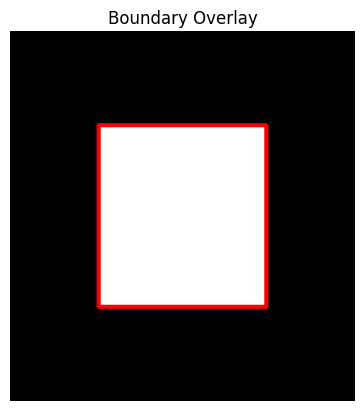

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def chain_code(binary_image, connectivity=4):
    
    if connectivity == 4:
        directions = [(0,1), (1,0), (0,-1), (-1,0)] 
     
    else:
        directions = [(0,1), (-1,1), (-1,0), (-1,-1), (0,-1), (1,-1), (1,0), (1,1)] 

    
    
    image = binary_image.copy()
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

    
    starting_pixel = None
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            if image[row, col] == 255:
                starting_pixel = (row, col)
                break
        if starting_pixel:
            break

    
    if not starting_pixel:
        return [], None, None, "No foreground pixel found"

    
    boundary_points = [starting_pixel]
    chaincode = []
    current_pixel = starting_pixel
    current_direction = 1 if connectivity == 8 else 3  

    
    while True:
        pixel_found = False

        
        for offset in range(len(directions)):
            direction_index = (current_direction + offset) % len(directions)
            row_offset, col_offset = directions[direction_index]
            neighbor_row = current_pixel[0] + row_offset
            neighbor_col = current_pixel[1] + col_offset

    
            if image[neighbor_row, neighbor_col] == 255:
                current_pixel = (neighbor_row, neighbor_col)
                boundary_points.append(current_pixel)

                
                current_direction = (direction_index + len(directions) - 2) % len(directions)

                
                if len(chaincode) == 0 or chaincode[-1] != direction_index:
                    chaincode.append(direction_index)

                pixel_found = True
                break 

        
        if not pixel_found or current_pixel == starting_pixel:
            break


    overlay_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
    for point in boundary_points:
        x = point[1] - 1  
        y = point[0] - 1  
        cv2.circle(overlay_image, (x, y), 1, (0, 0, 255), -1)

    return chaincode, overlay_image, None



input_image = cv2.imread(r"C:\Users\Kaustubh Pareek\Desktop\CV_Project\assets\Square.jpeg", cv2.IMREAD_GRAYSCALE)


if input_image is None:
    print("Image not found or path is incorrect")
else:
    
    _, binary_image = cv2.threshold(input_image, 127, 255, cv2.THRESH_BINARY)

    
    chaincode,  overlay_image, error = chain_code(binary_image, connectivity=8)

    
    if error:
        print(error)
    else:
    
        print("Compressed Chain Code:", chaincode)

        
        overlay_rgb = cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB)

        
        plt.imshow(overlay_rgb)
        plt.title("Boundary Overlay")
        plt.axis('off')
        plt.show()